In [1]:
library(memes)

# Verify that memes detects your meme install
# (returns all green checks if so)
check_meme_install(meme_path = "/apps/eb/MEME/5.4.1-foss-2019b-Python-3.7.4/bin/")
options(meme_bin = "/apps/eb/MEME/5.4.1-foss-2019b-Python-3.7.4/bin/")

checking main install

✔ /apps/eb/MEME/5.4.1-foss-2019b-Python-3.7.4/bin
checking util installs

✔ /apps/eb/MEME/5.4.1-foss-2019b-Python-3.7.4/bin/dreme
✔ /apps/eb/MEME/5.4.1-foss-2019b-Python-3.7.4/bin/ame
✔ /apps/eb/MEME/5.4.1-foss-2019b-Python-3.7.4/bin/fimo
✔ /apps/eb/MEME/5.4.1-foss-2019b-Python-3.7.4/bin/tomtom
✔ /apps/eb/MEME/5.4.1-foss-2019b-Python-3.7.4/bin/meme
✔ /apps/eb/MEME/5.4.1-foss-2019b-Python-3.7.4/bin/streme


In [2]:
#library(tidyverse)
library(devtools)
#library(motifmatchr)
#library(BiocParallel)
suppressPackageStartupMessages(library(magrittr))
suppressPackageStartupMessages(library(GenomicRanges))
load_all('/home/jpm73279/genome_downloads/BS_genomes/BSgenome.Zm_B73')
load_all('/home/jpm73279/genome_downloads/BS_genomes/BSgenome.Sb')

Loading required package: usethis

ℹ Loading BSgenome.Zm_B73
Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer

ℹ Loading BSgenome.Sb


In [3]:
acr <- read.table("/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/Zm.V4_acr_classification.companion_cells.cts.ACRs.bed")[-1,]

In [4]:
suppressPackageStartupMessages(library(magrittr))
suppressPackageStartupMessages(library(GenomicRanges))

# Example transcription factor peaks as GRanges
    # convert ACRs to Granges
acr.gr <- GRanges(seqnames=as.character(acr$V1),
    ranges=IRanges(start=as.numeric(acr$V2),
    end=as.numeric(acr$V3)))



# Genome object
zm.genome <- BSgenome.Zm_B73

In [5]:
sequences <- acr.gr  %>% 
  get_sequence(zm.genome)

In [13]:
dreme_results <- runStreme(sequences, control = "shuffle", e = 50)

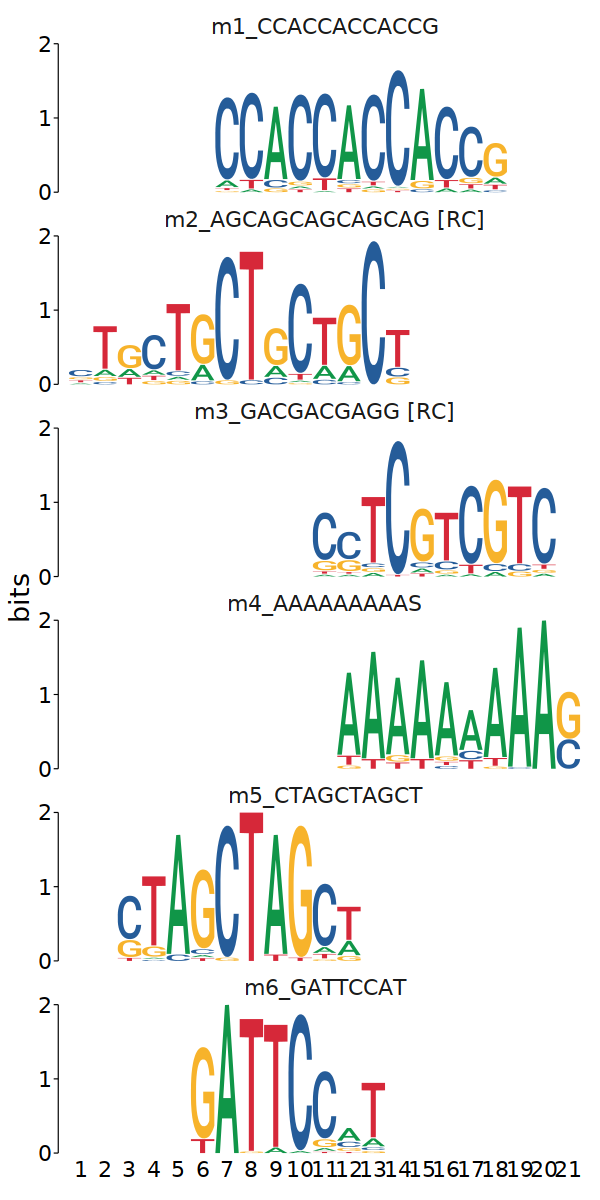

In [15]:
library(universalmotif)

options(repr.plot.width=5, repr.plot.height=10)
dreme_results %>% 
  to_list() %>% 
  view_motifs()

In [ ]:
acr <- read.table("/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/Sb/Sb.V4_acr_classification.companion_cells_sieve_elements.cts.ACRs.bed")[-1,]

suppressPackageStartupMessages(library(magrittr))
suppressPackageStartupMessages(library(GenomicRanges))

# Example transcription factor peaks as GRanges
    # convert ACRs to Granges
acr.gr <- GRanges(seqnames=as.character(acr$V1),
    ranges=IRanges(start=as.numeric(acr$V2),
    end=as.numeric(acr$V3)))



# Genome object
sb.genome <- BSgenome.Sb

sequences <- acr.gr  %>% 
  get_sequence(sb.genome)

dreme_results <- runStreme(sequences, control = "shuffle", e = 50)

library(universalmotif)

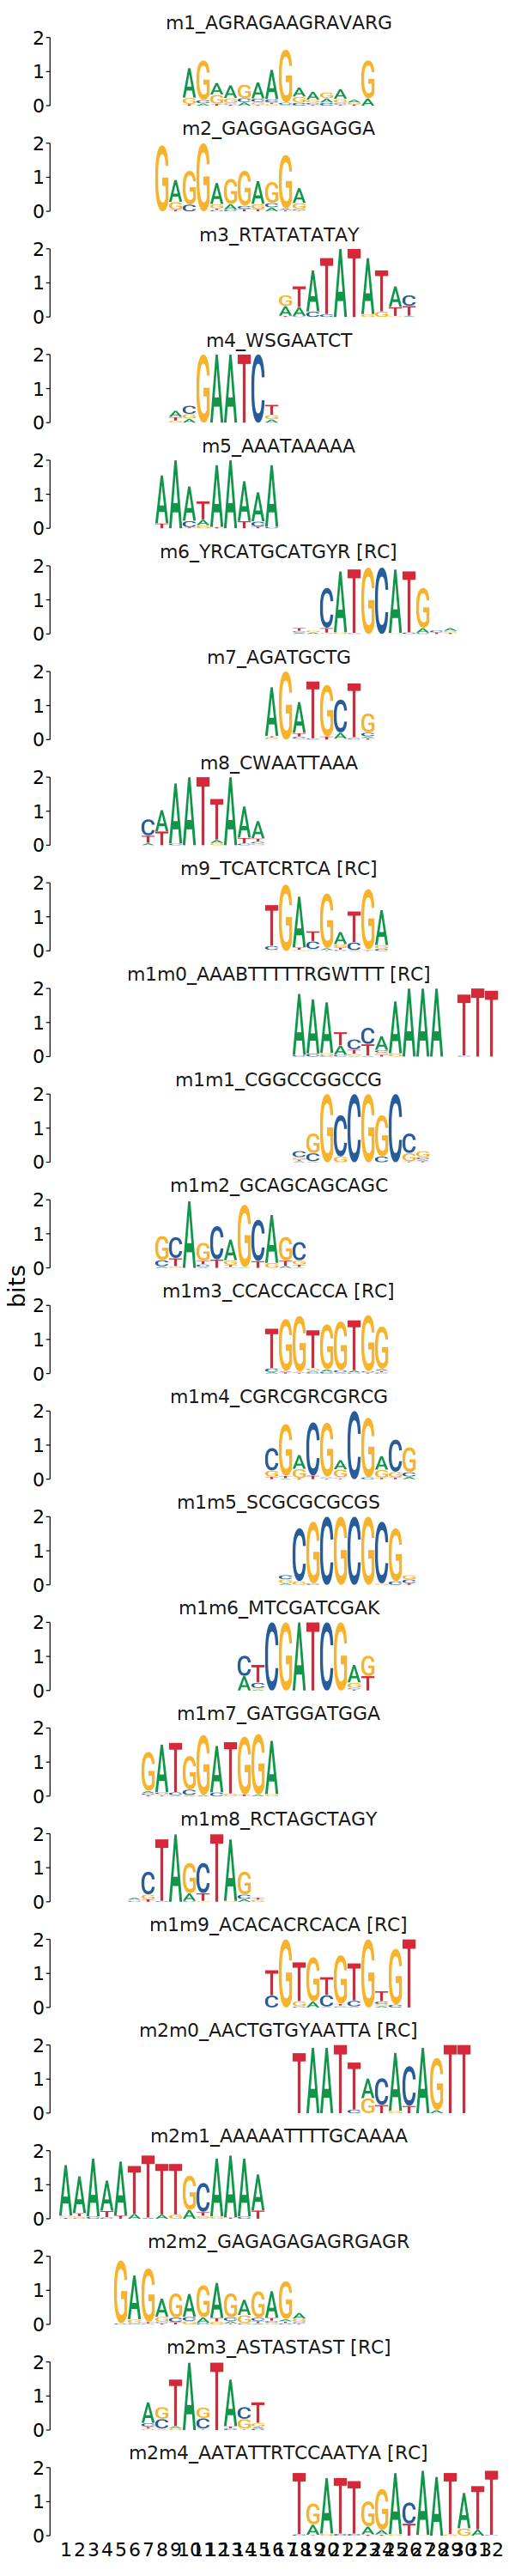

In [19]:
options(repr.plot.width=5, repr.plot.height=25)
dreme_results %>% 
  to_list() %>% 
  view_motifs()

In [21]:
dreme_results <- runStreme(sequences, control = "shuffle", e = 50, outdir = "/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/ZM/test")

In [25]:
zm_cts <- c("Zm.V4_acr_classification.bundle_sheath.cts.ACRs.bed")

In [27]:
library(stringr)
x <- str_replace(as.character(zm_cts[1]), "Zm.V4_acr_classification.", "")
y <- str_replace(as.character(x), ".cts.ACRs.bed", "")
y

[1] "bundle_sheath"

In [65]:
run_streme_save_results <- function(acr_file, genome_variable, base_name){
    
    
    generate_output_dir_1 <- str_replace(as.character(acr_file), base_name, "") 
    generate_output_dir <- str_replace(as.character(generate_output_dir_1), ".cts.ACRs.bed", "")
    
    ctoutdir <- file.path(mainDir, generate_output_dir)
    dir.create(ctoutdir)
    
    acr <- read.table(file.path(mainDir, acr_file))[-1,]
    head(acr)
    #exons <- read.table(exon_file)[-1,]

# Example transcription factor peaks as GRanges
    # convert ACRs to Granges
    acr.gr <- GRanges(seqnames=as.character(acr$V1),
        ranges=IRanges(start=as.numeric(acr$V2),
        end=as.numeric(acr$V3)))
    
    #exons.gr <- GRanges(seqnames=as.character(exons$V1),
    #    ranges=IRanges(start=as.numeric(exons$V2),
    #    end=as.numeric(exons$V3)))
    
    
    #hits <- findOverlaps(acr.gr, exons.gr)
    #grl <- extractList(exons.gr, as(hits, "List"))
    #finalized_non_exon_acrs <- psetdiff(acr.gr, grl)
    



    # Genome object
    genome.bs <- genome_variable

    sequences <- acr.gr  %>% 
      get_sequence(genome.bs)

    #q <- "/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/ZM/bundle_sheath"

    dreme_results <- runStreme(sequences, 
                               control = "shuffle", 
                               e = 50,
                               outdir = ctoutdir)

    return(dreme_results)
}



In [58]:
mainDir <- "/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/ZM"
#y <- run_streme_save_results(zm_cts[1], 
#                       BSgenome.Zm_B73, "Zm.V4_acr_classification.")



In [66]:
zm_cts <- c("Zm.V4_acr_classification.bundle_sheath.cts.ACRs.bed",
"Zm.V4_acr_classification.companion_cells.cts.ACRs.bed",
"Zm.V4_acr_classification.developing_mesophyll.cts.ACRs.bed",
"Zm.V4_acr_classification.epidermis.cts.ACRs.bed",
"Zm.V4_acr_classification.ground_meristem.cts.ACRs.bed",
"Zm.V4_acr_classification.mesophyll.cts.ACRs.bed",
"Zm.V4_acr_classification.procambium.cts.ACRs.bed",
"Zm.V4_acr_classification.protoderm.cts.ACRs.bed",
"Zm.V4_acr_classification.sieve_elements.cts.ACRs.bed",
"Zm.V4_acr_classification.stomatal_precursor.cts.ACRs.bed",
"Zm.V4_acr_classification.subsidiary_cells.cts.ACRs.bed",
"Zm.V4_acr_classification.subsidiary_mother_cells.cts.ACRs.bed",
"Zm.V4_acr_classification.unknown.cts.ACRs.bed")


mainDir <- "/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/ZM"
run_all <- lapply(zm_cts, run_streme_save_results, genome_variable = BSgenome.Zm_B73, base_name = "Zm.V4_acr_classification.")



Warning message in dir.create(ctoutdir):
“'/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/ZM/bundle_sheath' already exists”


In [68]:
sb_cts <- c("Sb.V4_acr_classification.bundle_sheath.cts.ACRs.bed",
"Sb.V4_acr_classification.companion_cells_sieve_elements.cts.ACRs.bed",
"Sb.V4_acr_classification.developing_mesophyll.cts.ACRs.bed",
"Sb.V4_acr_classification.epidermis.cts.ACRs.bed",
"Sb.V4_acr_classification.ground_meristem.cts.ACRs.bed",
"Sb.V4_acr_classification.mesophyll.cts.ACRs.bed",
"Sb.V4_acr_classification.phloem.cts.ACRs.bed",
"Sb.V4_acr_classification.procambium.cts.ACRs.bed",
"Sb.V4_acr_classification.protoderm.cts.ACRs.bed",
"Sb.V4_acr_classification.proto_xylem.cts.ACRs.bed",
"Sb.V4_acr_classification.unknown.7.cts.ACRs.bed")


mainDir <- "/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/Sb"
run_all_sb <- lapply(sb_cts, run_streme_save_results, genome_variable = BSgenome.Sb, base_name = "Sb.V4_acr_classification.")


Warning message in dir.create(ctoutdir):
“'/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/Sb/bundle_sheath' already exists”
